## Chapter 5

### Geodetic Line

In [3]:
import pyproj

g = pyproj.Geod(ellps='WGS84')

startlong = 8.5391632   # Zurich
startlat = 47.3771216   

endlong = -74.001457    # New York
endlat = 40.7094328

lonlats = g.npts(startlong, startlat, endlong, endlat, 10)

lonlats = [(startlong, startlat)] + lonlats +  [(endlong, endlat)]

print(lonlats)

[(8.5391632, 47.3771216), (1.397495153397597, 49.44907987299053), (-6.296004041923995, 51.0437468804707), (-14.4400297946599, 52.09977246491292), (-22.866013276407035, 52.570887434787934), (-31.356219287592044, 52.43480429023669), (-39.680924555983296, 51.69807128642939), (-47.64069920278476, 50.394607653883355), (-55.09612543263509, 48.578629009037726), (-61.976096988557316, 46.315095084828826), (-68.2682851881007, 43.67101309956473), (-74.001457, 40.7094328)]


### Cartopy

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

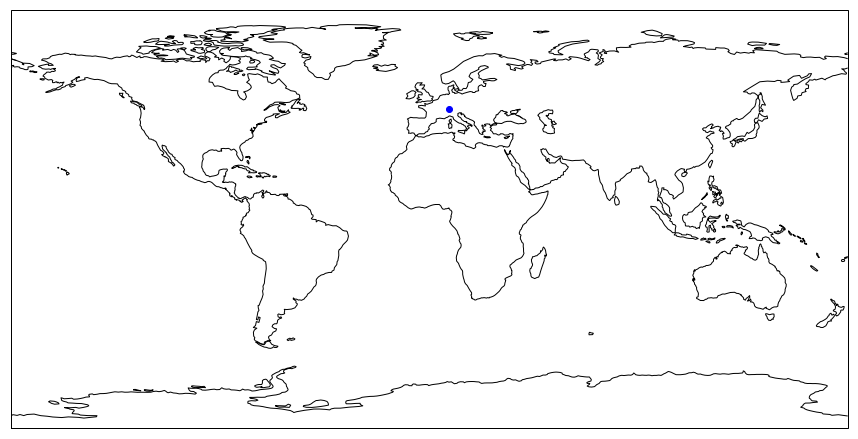

In [7]:
plt.figure(figsize=(15, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution='110m')

x = 8.539418
y = 47.378115
ax.plot(x,y, color='blue', linewidth=2, marker='o')

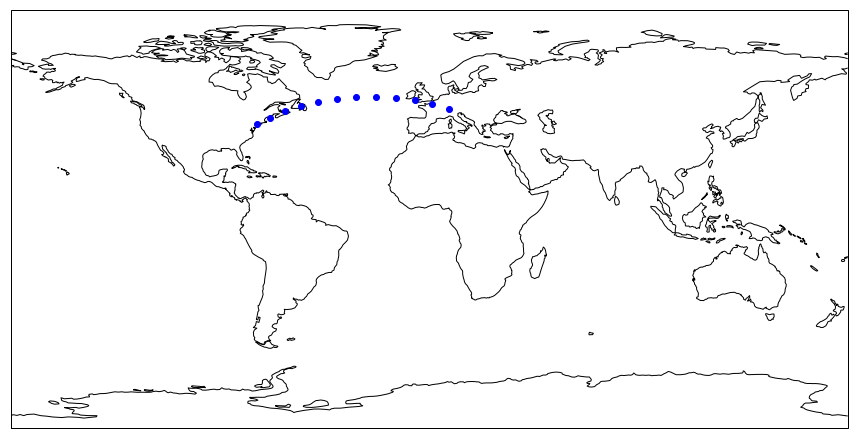

In [9]:
plt.figure(figsize=(15, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution='110m')

for coord in lonlats:
    ax.plot(coord[0], coord[1], color='blue', linewidth=2, marker='o')


## Adding more Features

Check the matplotlib documentation for linestyles and colors:

* linestyle: https://matplotlib.org/2.1.1/gallery/lines_bars_and_markers/line_styles_reference.html
* color: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.colors.html 

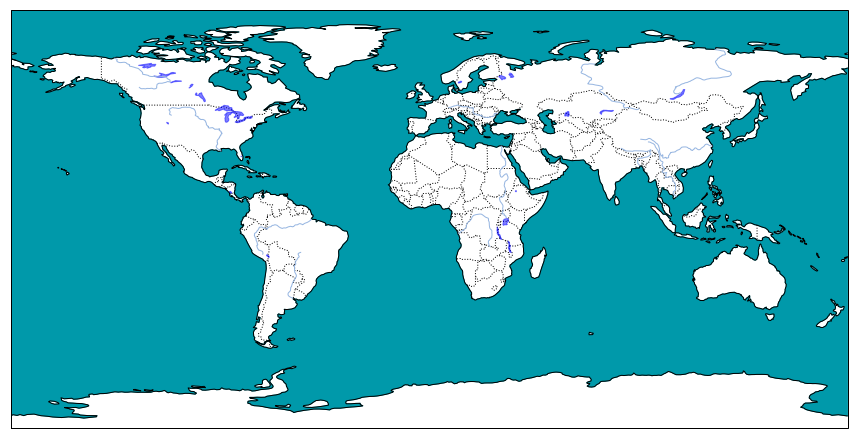

In [20]:
plt.figure(figsize=(15, 9))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, color="white")
ax.add_feature(cfeature.OCEAN, color="#0099AA")
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')  # 
ax.add_feature(cfeature.LAKES, alpha=0.5, color="blue")
ax.add_feature(cfeature.RIVERS);



## Albers Projection

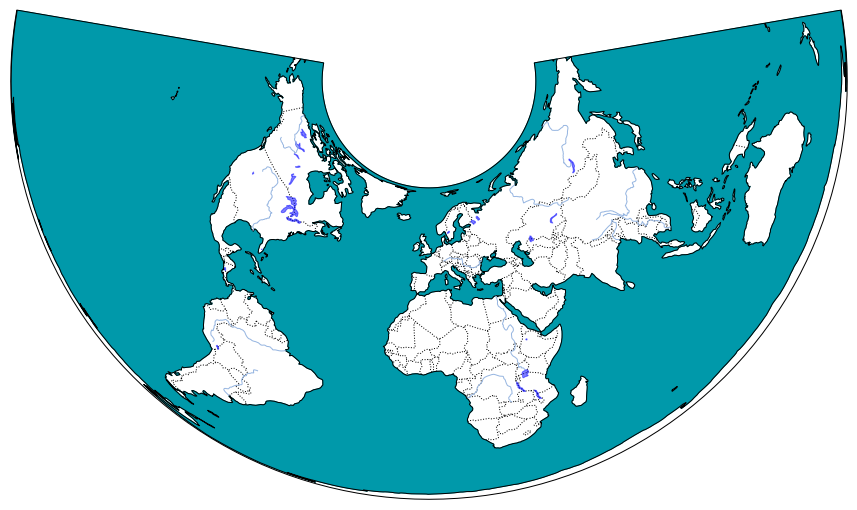

In [43]:
plt.figure(figsize=(18, 9))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=0.0, 
                                              central_latitude=0.0, 
                                              false_easting=0.0, 
                                              false_northing=0.0, 
                                              standard_parallels=(20.0, 50.0)))

ax.add_feature(cfeature.LAND, color="white")
ax.add_feature(cfeature.OCEAN, color="#0099AA")
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')  # 
ax.add_feature(cfeature.LAKES, alpha=0.5, color="blue")
ax.add_feature(cfeature.RIVERS);


In [50]:
import pyproj

zurich_longitude = 8.5391632
zurich_latitude = 47.3771216

wgs84=pyproj.Proj("+init=EPSG:4326")
lv95=pyproj.Proj("+init=EPSG:2056")

In [52]:
result = pyproj.transform(wgs84, lv95, zurich_longitude, zurich_latitude)
result

(2683111.9823819078, 1247947.5735251254)